Лабораторная работа 5.

In [1]:
import sys
sys.path.append('..')
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from utility import util
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

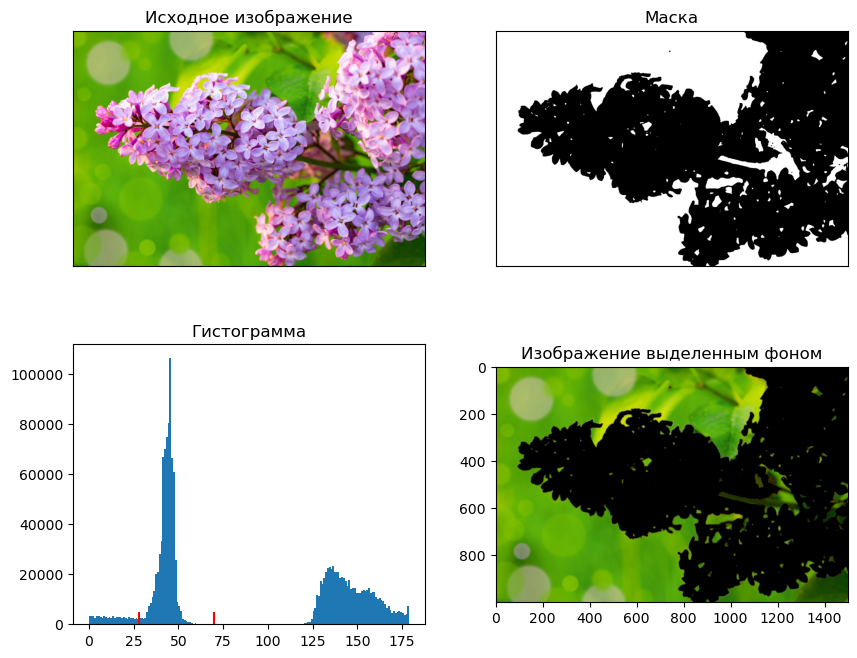

In [4]:
image3 = cv.imread('lab5.png')
rgb_image3 = cv.cvtColor(image3, cv.COLOR_BGR2RGB)
hsv_image3 = cv.cvtColor(rgb_image3, cv.COLOR_RGB2HSV)
h, s, v = cv.split(hsv_image3)

low_h = 28
high_h = 70

mask = cv.inRange(h, low_h, high_h)
result = cv.bitwise_and(rgb_image3, rgb_image3, mask=mask)
blur = cv.GaussianBlur(result, (7, 7), 0)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(rgb_image3)
plt.title('Исходное изображение')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[1])
plt.imshow(mask, cmap='gray')
plt.title('Маска')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[2])
plt.hist(h.reshape(-1), np.max(h), [np.min(h), np.max(h)])
plt.vlines(low_h, 0, 5000, 'r'), plt.vlines(high_h, 0, 5000, 'r')
plt.title('Гистограмма')
plt.subplot(gs[3])
plt.imshow(blur)
plt.title('Изображение выделенным фоном')
plt.show()